# Fourier Optics

(Using Angular Spectrum method)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft2
from scipy.fft import ifft2
from scipy.fft import fftfreq
from scipy.fft import fftshift

import pint #for units

In [16]:
u = pint.UnitRegistry()

# Computing the diffraction pattern made by light at some distance away from a pinhole aperture

Text(0, 0.5, 'Y [mm]')

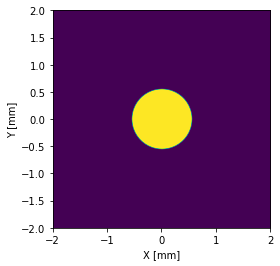

In [17]:
#Define spatial grid
a = np.linspace(-2,2,2000)*u.mm
X,Y = np.meshgrid(a,a)

#define geometric parameters
r = 0.55*u.mm #radius of pinhole

#Define geometry at z0
U0 = np.abs(X**2 + Y**2)< r**2
U0 = U0.astype(float)

#Visualize
plt.imshow(U0, extent=[-2, 2, -2, 2])
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')

In [18]:
#Wavelength of light
wavelength = 532*u.nm

#here we define the frequency domain (frequencies to be sampled in the Fourier tranform)
spatial_grid_spacing = a[1]-a[0] #basically the spatial freq
kx = fftfreq(len(a),spatial_grid_spacing)*2*np.pi #multiplying by 2*pi converts the freq to angular freq
KX, KY = np.meshgrid(kx,kx)

k = 2*np.pi/wavelength 

In [19]:
A = fft2(U0)

def propagate(z):
    return(ifft2(A*np.exp(1j*z*np.sqrt(k**2-KX**2-KY**2))))

In [20]:
#define the z at which to compute the function
z_value = 20*u.cm

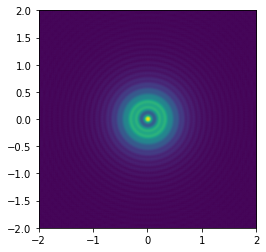

In [21]:
U_z = propagate(z_value)

plt.imshow(np.abs(U_z), extent=[-2, 2, -2, 2])

We see an airy disk pattern as expected

# Reconstructing the image of the aperture by propagating the image of the diffraction pattern backwards

In [22]:
later_image = U_z

In [23]:
#define the z at which to compute the function
z_value = -20*u.cm #here the minus sign indicates backward propagation

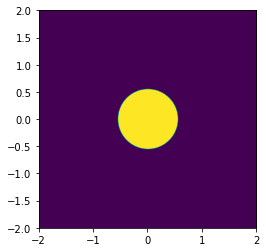

In [24]:
A = fft2(later_image)
U_z_2 = propagate(z_value)

plt.imshow(np.abs(U_z_2), extent=[-2, 2, -2, 2])

We are able to reconstruct the circular aperture as expected